In [ ]:
# Make a copy and rename this notebook when working on your branch. i.e. predictive_biomarkers_RH.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("/Users/harunr/proj/shapml/")
from shapml import binary_classification as BC
from shapml import utils
import warnings 
warnings.filterwarnings(action='ignore')

%config Completer.use_jedi = False

Loading BokehJS ...

# Run analysis

In [51]:
csv_path = 'data/dataset_clean.csv' # T: find out out to extract from "file=st.file_uploader('load file')"
drop_cols = ['synthetic_probability', 'asdfs'] # *T: create way to exclude model features (hint: st.multi_select), by
exposure_var = 'CTR1' #T: create UI to select exposure_var
target = 'synthetic_target'#T: select way create UI to select binary target variable

In [54]:
df_orig = pd.read_csv(csv_path)


In [53]:
final_cols2drop = [col for col in drop_cols if col in df_orig.columns]
df=df_orig.drop(columns=final_cols2drop)
df

,CTR1,Treatment_Flag,SEXN,MADCAM1,RDW_base,STOOLFN,PLATE_base,LDH_base,CREATN_base,BEMCS,BMCS,TPROT_base,BFECAL,BCRP,synthetic_target
0,4.545822,1,2,35.191478,13.039093,1,260,361,78,2,7,76,179.346304,3.171967,1
1,0.000000,0,1,31.788908,14.958217,1,379,209,52,3,6,75,551.386183,5.435250,0
2,0.000000,0,2,24.489860,14.139639,2,212,161,71,3,8,74,8877.368737,3.022854,0
3,4.447084,1,2,24.386446,13.654885,1,228,156,88,3,8,72,1556.656010,3.413336,1
4,0.000000,0,2,20.007027,14.247521,3,530,136,89,3,9,74,10887.520430,18.111985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3.720507,1,1,15.728198,15.389179,2,359,153,64,3,9,75,1312.611712,7.802775,0
1496,0.000000,0,2,37.418915,16.255661,2,275,98,70,3,8,72,5411.970848,1.003458,0
1497,0.000000,0,2,8.073702,15.423976,2,429,120,77,3,10,65,17015.746010,23.829628,0
1498,2.395419,1,1,21.607647,13.700000,1,399,147,54,2,8,78,287.195513,1.615168,0


In [7]:
analysis=BC.xgb_shap(df=df_orig,
                     target=target, exposure_var=exposure_var,
                    max_evals=5, bootstrap_iterations=100, n_folds_SHAP=5)# optional parameters set for the sake of computations efficiency
analysis.tune_model()

100%|██████████| 5/5 [00:03<00:00,  1.62trial/s, best loss: 0.20009880521725143]
Done: took 3.0980331897735596 seconds
The best hyperparameters are:  

{'eta': 0.12190960760867987, 'max_depth': 3, 'min_child_weight': 0.10704698010661089, 'reg_alpha': 8.149043639957283, 'reg_lambda': 16.193315456719624, 'subsample': 0.8977155615500958, 'objective': 'binary:logistic', 'tree_method': 'exact', 'eval_metric': 'error'}


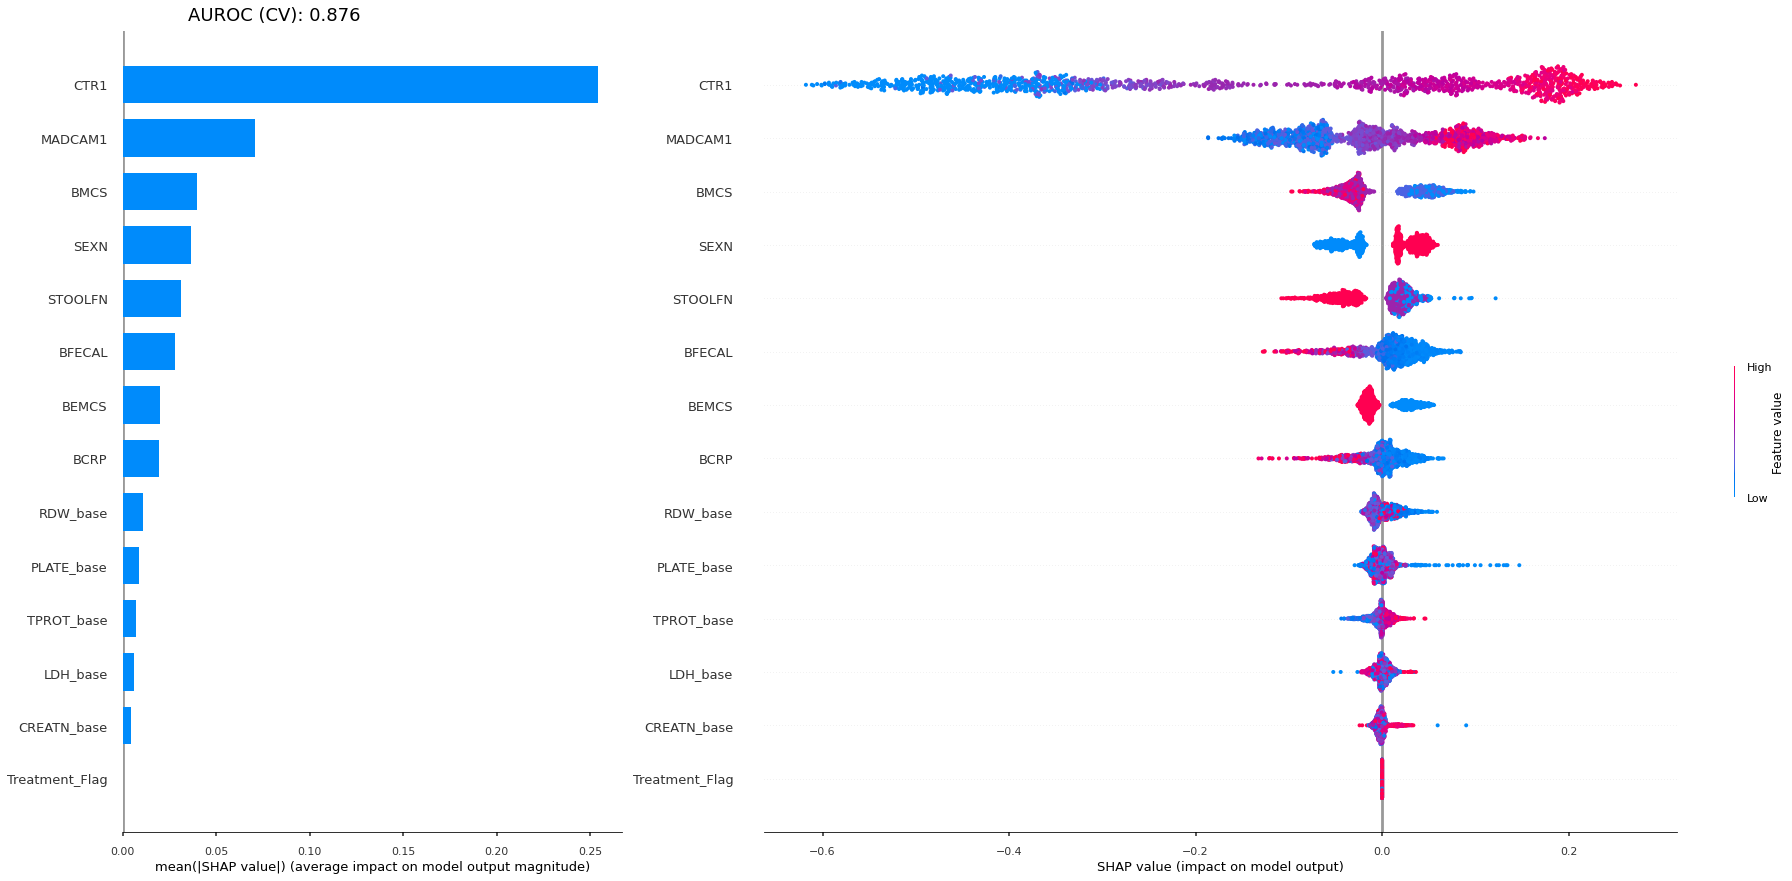

In [55]:
fig = analysis.shap_summary_plots(show=False) # Running this performs necessary analyses
fig
# fig # This can be optionally showed for showing feature impacts on response probability

# Factors that interact with exposure

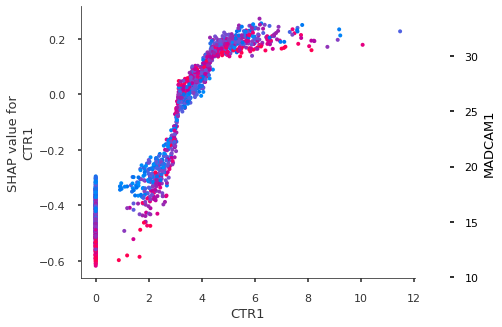

In [9]:
analysis.dependence_plot('CTR1')

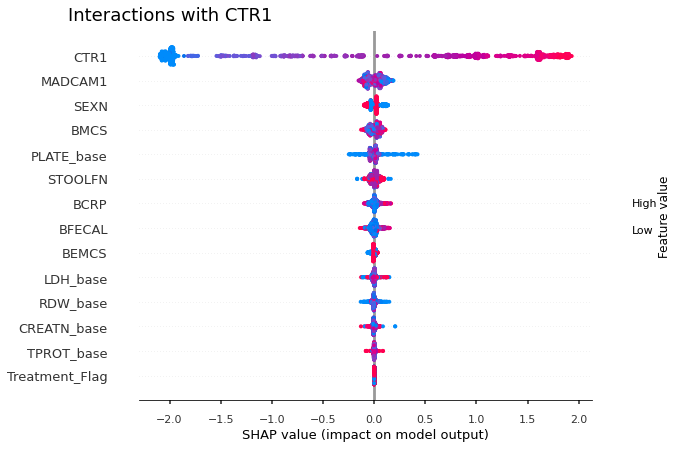

In [10]:
analysis.shap_interaction_summary(feature='CTR1')

Interaction values in probability scale were not found; using log-odds scale
Hint: self.generate_shap_exposure_interaction_prob_df(exposure_var)


,covariate,mean impact,std,covariate impact on ER
0,MADCAM1,0.064155,0.036374,0.0642±0.0364
1,SEXN,0.043316,0.031311,0.0433±0.0313
2,BMCS,0.040415,0.022021,0.0404±0.0220
3,PLATE_base,0.032275,0.048837,0.0323±0.0488
4,STOOLFN,0.026874,0.022533,0.0269±0.0225
5,BCRP,0.024945,0.024672,0.0249±0.0247
6,BFECAL,0.024626,0.026706,0.0246±0.0267
7,BEMCS,0.013299,0.011066,0.0133±0.0111
8,LDH_base,0.012279,0.017823,0.0123±0.0178
9,RDW_base,0.011826,0.015726,0.0118±0.0157


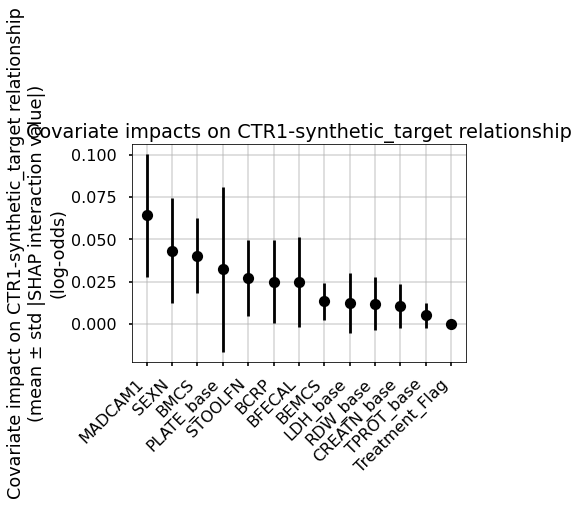

In [11]:
out = analysis.shap_exposure_impacts(exposure_var='CTR1');
out # The magniture of the impact on the exposure is of key importance (not the variance, because we expect an influential factor to have high variance)

Interaction values in probability scale were not found; using log-odds scale
Hint: self.generate_shap_exposure_interaction_prob_df(exposure_var)
Interaction values in probability scale were not found; using log-odds scale
Hint: self.generate_shap_exposure_interaction_prob_df(exposure_var)
Interaction values in probability scale were not found; using log-odds scale
Hint: self.generate_shap_exposure_interaction_prob_df(exposure_var)
No dose_var was supplied assumming placebo pts using: ((df[exposure_var]==0)
No dose_var was supplied assumming Tx pts using: (df[exposure_var].isna()) | (df[exposure_var]>0)
Tx-related risk difference for MADCAM1≤18 : 0.333
Tx-related risk difference for MADCAM1>18 : 0.582
Group with greater risk difference:  MADCAM1>18
synthetic_target rate for placebo MADCAM1≤18 (low-risk group): 0.041
synthetic_target rate for placebo MADCAM1>18 (high-risk group): 0.088
synthetic_target rate for Tx MADCAM1≤18 (low-risk group): 0.374
synthetic_target rate for Tx MADCAM1>18

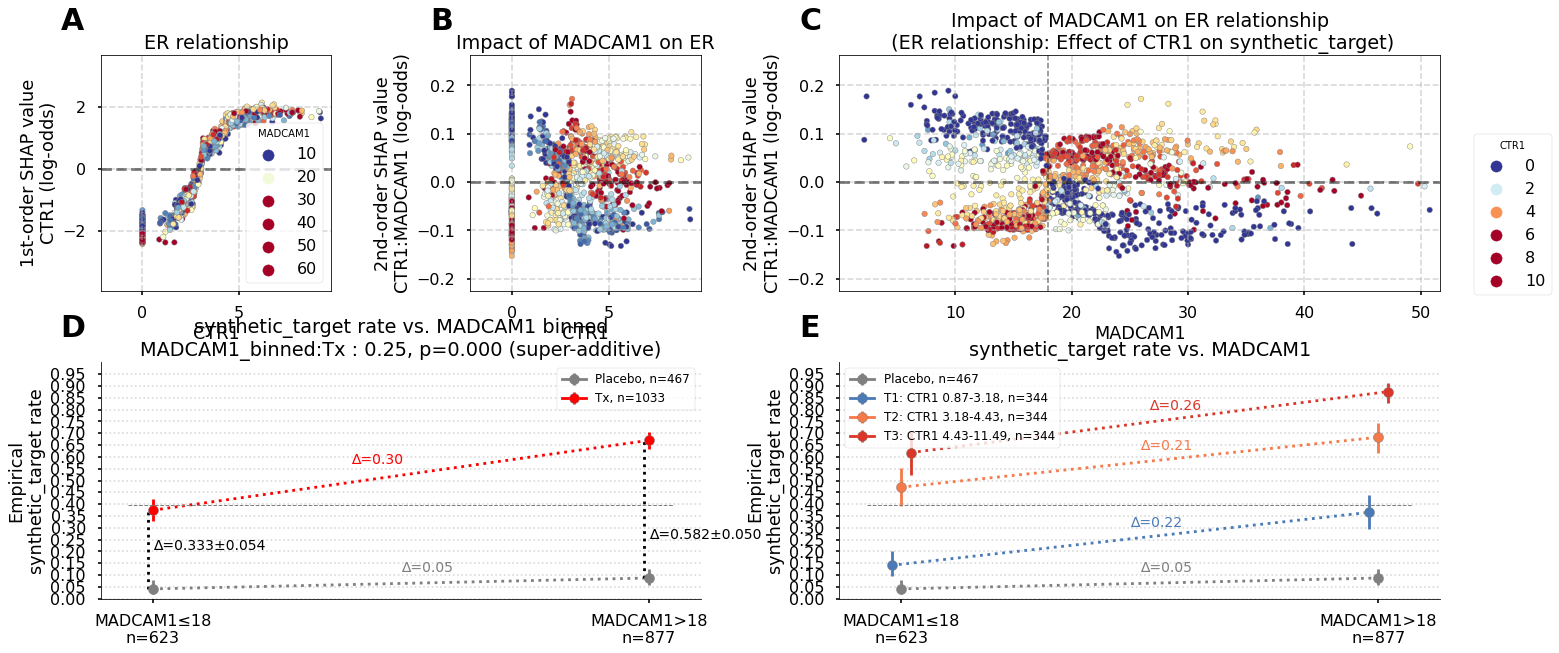

In [12]:
analysis.cutoff_analysis('MADCAM1', feature_thr=18, ylims=[0,1])

Interaction values in probability scale were not found; using log-odds scale
Hint: self.generate_shap_exposure_interaction_prob_df(exposure_var)
Interaction values in probability scale were not found; using log-odds scale
Hint: self.generate_shap_exposure_interaction_prob_df(exposure_var)
Interaction values in probability scale were not found; using log-odds scale
Hint: self.generate_shap_exposure_interaction_prob_df(exposure_var)
No dose_var was supplied assumming placebo pts using: ((df[exposure_var]==0)
No dose_var was supplied assumming Tx pts using: (df[exposure_var].isna()) | (df[exposure_var]>0)
Tx-related risk difference for SEXN≤1.5 : 0.395
Tx-related risk difference for SEXN>1.5 : 0.538
Group with greater risk difference:  SEXN>1.5
synthetic_target rate for placebo SEXN≤1.5 (low-risk group): 0.086
synthetic_target rate for placebo SEXN>1.5 (high-risk group): 0.054
synthetic_target rate for Tx SEXN≤1.5 (low-risk group): 0.481
synthetic_target rate for Tx SEXN>1.5 (high-risk gr

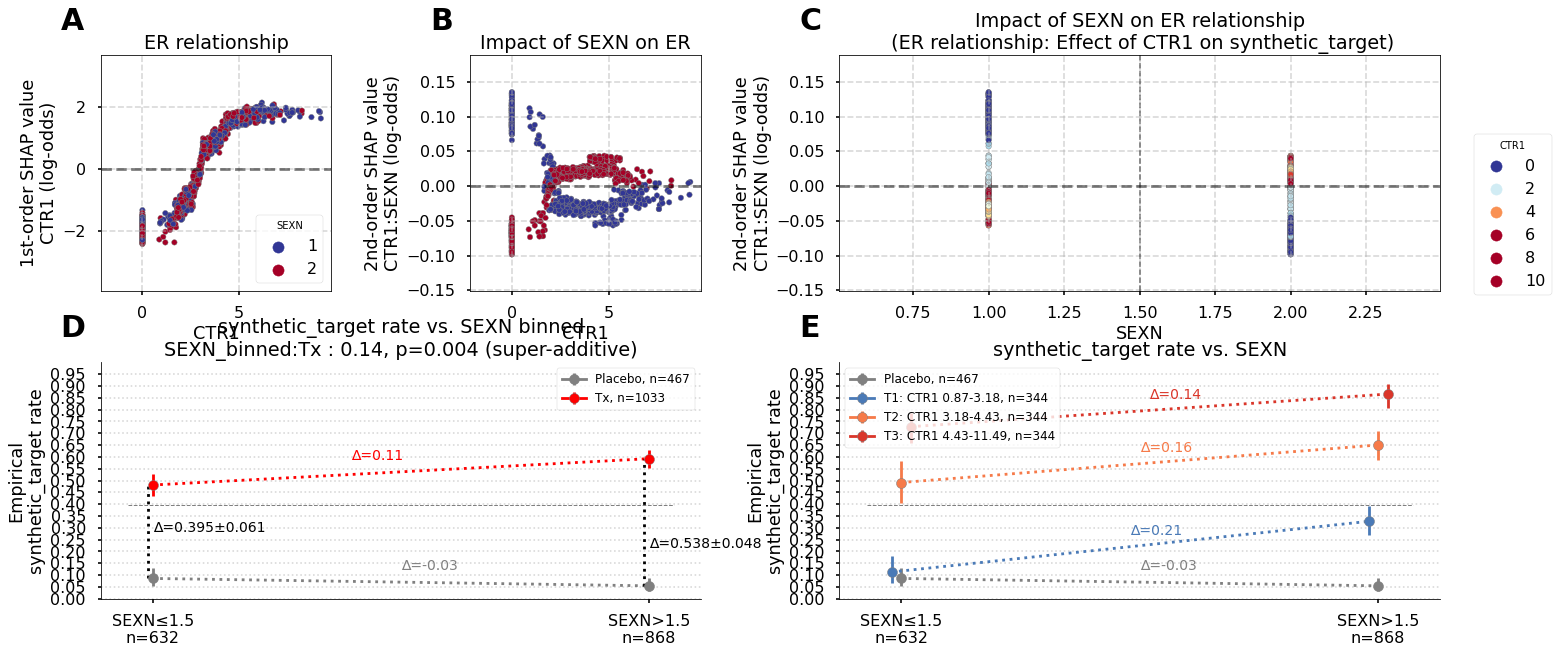

In [13]:
analysis.cutoff_analysis('SEXN', feature_thr=1.5, ylims=[0,1])

# Example syntax for how to modularize code:

In [14]:
self = analysis

In [21]:
self.shap_interaction_values.shape

(1500, 14, 14)

,CTR1,Treatment_Flag,SEXN,MADCAM1,RDW_base,STOOLFN,PLATE_base,LDH_base,CREATN_base,BEMCS,BMCS,TPROT_base,BFECAL,BCRP
0,1.498422,0.0,0.036538,0.006513,-0.017584,0.026880,-0.000505,-0.017094,0.010390,-0.027545,0.057957,0.001618,0.027158,0.001581
1,-1.964386,0.0,0.115668,-0.066560,-0.017210,-0.050210,-0.036830,0.005021,-0.010433,-0.006787,-0.009716,-0.001841,-0.026186,-0.003742
2,-1.991824,0.0,-0.079134,-0.072782,-0.017181,-0.027013,0.190162,-0.009734,-0.012117,-0.006764,-0.053403,-0.001841,0.152908,-0.009424
3,1.425126,0.0,0.034368,0.036995,0.009415,0.020458,-0.040433,0.003870,-0.035243,0.006554,0.071020,0.001436,-0.009145,0.004037
4,-1.954086,0.0,-0.088300,-0.054368,-0.020492,0.050878,-0.039429,-0.000922,0.040316,-0.004815,0.020018,-0.002010,0.089440,0.060691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1.076862,0.0,-0.033489,-0.095422,0.000010,0.029445,0.011356,0.003292,0.002238,-0.010287,-0.053904,-0.006221,0.015229,-0.042953
1496,-2.063099,0.0,-0.050073,-0.088249,0.005727,-0.023290,-0.021630,0.119611,-0.004800,-0.006453,-0.066382,0.002637,0.087731,-0.022103
1497,-2.012616,0.0,-0.063195,0.108363,-0.005609,-0.021711,-0.039966,-0.018498,-0.006528,-0.007645,0.045828,0.004088,0.108512,0.084493
1498,-0.740863,0.0,-0.028844,-0.063926,-0.001018,0.002496,0.003578,0.000127,-0.005667,0.020139,-0.026313,-0.005978,-0.002235,0.000769


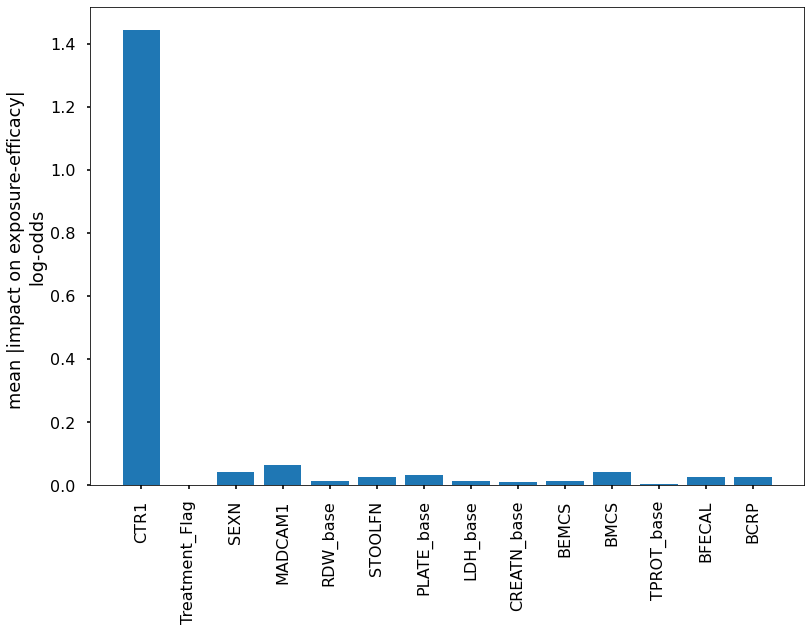

In [44]:
shap_exposure_interaction_df = pd.DataFrame(self.shap_interaction_values[:, self.mdlFeatures.index('CTR1')], columns=self.mdlFeatures) # in log-odds scale
display(shap_exposure_interaction_df)
fig=plt.figure()
fig = plt.bar(x=range(len(self.mdlFeatures)), height=shap_exposure_interaction_df.agg(lambda x: np.mean(np.abs(x))))
plt.xticks(range(len(self.mdlFeatures)), labels=self.mdlFeatures, rotation=90)
plt.ylabel('mean |impact on exposure-efficacy| \nlog-odds')
plt.show()

Wrap it up in a funciton that returns a figure that can be included in the streamlit app easily:

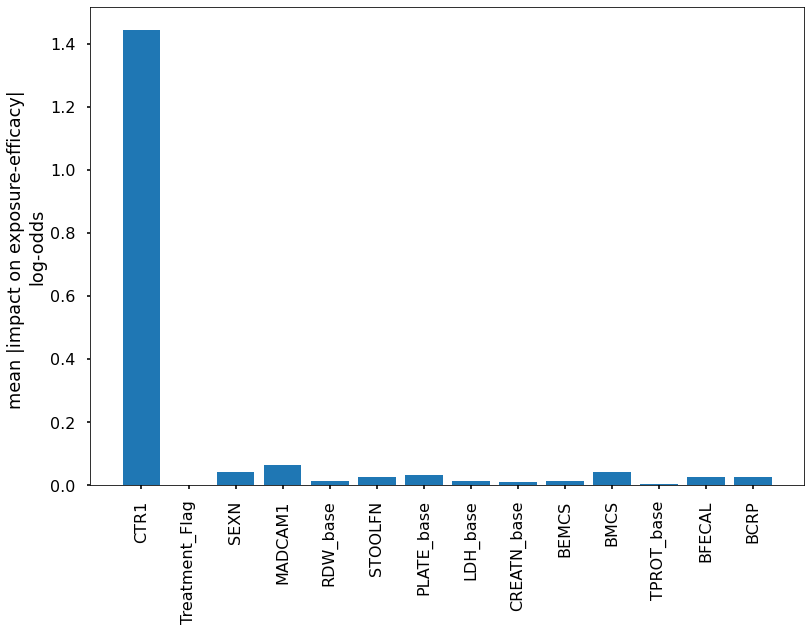

<BarContainer object of 14 artists>

In [47]:
def plot_exposure_impacts(self, exposure_var='CTR1'): #T: Julie you can modify this (i.e. exclude CTR1 from this plot and however else you feel)
    shap_exposure_interaction_df = pd.DataFrame(self.shap_interaction_values[:, self.mdlFeatures.index(exposure_var)], columns=self.mdlFeatures) # in log-odds scale
    fig=plt.figure()
    fig = plt.bar(x=range(len(self.mdlFeatures)), height=shap_exposure_interaction_df.agg(lambda x: np.mean(np.abs(x))))
    plt.xticks(range(len(self.mdlFeatures)), labels=self.mdlFeatures, rotation=90)
    plt.ylabel('mean |impact on exposure-efficacy| \nlog-odds')
    plt.show()
    return fig
plot_exposure_impacts(self, exposure_var='CTR1')